## Data Gatering

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from IPython.display import Image
import urllib.request

#### 1. Twitter Archive

In [2]:
t_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
t_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### 2. Image Prediction

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response =requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

i_predictions= pd.read_csv('image_predictions.tsv', sep= "\t")

In [5]:
i_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### 3. Twitter API

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '####'
consumer_secret = '####'
access_token = '####'
access_secret = '####'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = t_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
# Import Tweet Json to dataframe
df_list= []
with open ('tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))
#Creating DataFrame using json file
tweet_data= pd.DataFrame(df_list, columns= ['id', 'retweet_count', 'favorite_count'])
tweet_data = tweet_data.rename(columns= {'id': 'tweet_id'})
#Saving tweet_data Data frame as csv file
tweet_data.to_csv('tweet_data.csv', index=False)
#checking Csv file
t_data= pd.read_csv('tweet_data.csv')
t_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7288,34779
1,892177421306343426,5447,30144
2,891815181378084864,3589,22680
3,891689557279858688,7481,38058
4,891327558926688256,8034,36346


## Data Assessing

#### 1) Twitter Archive

In [7]:
t_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
t_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
950,752173152931807232,NaN,NaN,2016-07-10 16:10:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. He's a lifeguard. Always prepar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752173152...,12,10,Brody,None,None,None,None
655,791784077045166082,NaN,NaN,2016-10-27 23:30:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I'm not sure what this dog is d...,6.820881e+17,4.196984e+09,2015-12-30 06:37:25 +0000,"https://vine.co/v/iqMjlxULzbn,https://vine.co/...",12,10,None,None,None,None,None
676,789314372632018944,NaN,NaN,2016-10-21 03:56:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOO...,NaN,NaN,NaN,https://twitter.com/sebscat/status/78881832853...,13,10,None,None,None,None,None
480,815736392542261248,NaN,NaN,2017-01-02 01:48:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Akumi. It's his birthday. He received ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815736392...,11,10,Akumi,None,None,None,None
762,778039087836069888,NaN,NaN,2016-09-20 01:12:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Evolution of a pupper yawn featuring Max. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778039087...,12,10,None,None,None,pupper,None
153,862457590147678208,NaN,NaN,2017-05-11 00:01:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Jersey. He likes to watch movies, but ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/862457590...,13,10,Jersey,None,None,None,None
1931,674036086168010753,NaN,NaN,2015-12-08 01:21:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Daisy. She has no eyes &amp; her face has...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674036086...,9,10,Daisy,None,None,None,None
1157,724405726123311104,NaN,NaN,2016-04-25 01:12:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ashleigh. She's having Coachella withd...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724405726...,10,10,Ashleigh,None,None,pupper,None
712,784431430411685888,NaN,NaN,2016-10-07 16:33:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stormy. He's curly af. Already pupared...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784431430...,12,10,Stormy,None,None,None,None
1525,690400367696297985,NaN,NaN,2016-01-22 05:07:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eriq. His friend just reminded him of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690400367...,10,10,Eriq,None,None,None,None


In [9]:
# Checking data types of the variables
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
t_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
t_archive.tweet_id.duplicated().sum()

0

In [12]:
t_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [13]:
t_archive.rating_numerator[t_archive.rating_numerator == 0]

315     0
1016    0
Name: rating_numerator, dtype: int64

In [14]:
t_archive.rating_numerator[t_archive.rating_numerator > 14]

55        17
188      420
189      666
285       15
290      182
291       15
313      960
340       75
433       84
516       24
695       75
763       27
902      165
979     1776
1120     204
1202      50
1228      99
1254      80
1274      45
1351      60
1433      44
1634     143
1635     121
1663      20
1712      26
1779     144
1843      88
2074     420
Name: rating_numerator, dtype: int64

In [15]:
t_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [16]:
t_archive.rating_denominator[t_archive.rating_denominator != 10]

313       0
342      15
433      70
516       7
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
2335      2
Name: rating_denominator, dtype: int64

In [17]:
t_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Toby           7
Buddy          7
an             7
Daisy          7
Bailey         7
Scout          6
Dave           6
Jax            6
Leo            6
Oscar          6
Stanley        6
Milo           6
Jack           6
Bella          6
Rusty          6
Koda           6
Alfie          5
            ... 
Frönq          1
Genevieve      1
Schnitzel      1
General        1
Gordon         1
Jed            1
Kirk           1
Dale           1
Ralphy         1
Linus          1
Stu            1
Blu            1
Tupawc         1
Kaiya          1
Pepper         1
Tom            1
Rhino          1
Flurpson       1
Divine         1
such           1
Zara           1
Snoop          1
Alexander      1
Sailor         1
Bowie          1
Sora           1
Duchess        1
Biden         

In [18]:
t_archive[t_archive.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
actually         2
not              2
mad              2
getting          2
officially       1
incredibly       1
all              1
by               1
his              1
old              1
life             1
such             1
infuriating      1
this             1
unacceptable     1
space            1
my               1
light            1
Name: name, dtype: int64

#### 2) Image Prediction

In [19]:
i_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1628,804738756058218496,https://pbs.twimg.com/media/CysBn-lWIAAoRx1.jpg,1,Tibetan_mastiff,0.915790,True,German_shepherd,0.062480,True,Leonberg,0.008297,True
1504,785170936622350336,https://pbs.twimg.com/media/CuV8yfxXEAAUlye.jpg,2,seat_belt,0.891193,False,Eskimo_dog,0.027494,True,Samoyed,0.019530,True
1182,738402415918125056,https://pbs.twimg.com/media/Cj9VEs_XAAAlTai.jpg,1,cocker_spaniel,0.346695,True,Blenheim_spaniel,0.193905,True,Chihuahua,0.078000,True
806,691820333922455552,https://pbs.twimg.com/media/CZnW7JGW0AA83mn.jpg,1,minivan,0.332756,False,sports_car,0.129452,False,limousine,0.073936,False
734,686947101016735744,https://pbs.twimg.com/media/CYiGvn-UwAEe4wL.jpg,1,refrigerator,0.799795,False,medicine_chest,0.182538,False,ice_bear,0.001431,False
1433,773547596996571136,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True
1629,805207613751304193,https://pbs.twimg.com/media/CyysDQlVIAAYgrl.jpg,1,Pembroke,0.244705,True,Rhodesian_ridgeback,0.180461,True,Cardigan,0.094664,True
768,689280876073582592,https://pbs.twimg.com/media/CZDRTAPUoAEaqxF.jpg,3,Chihuahua,0.637546,True,American_Staffordshire_terrier,0.150694,True,Staffordshire_bullterrier,0.103953,True
1135,728751179681943552,https://pbs.twimg.com/media/Ch0LVPdW0AEdHgU.jpg,1,Saint_Bernard,0.482050,True,collie,0.202740,True,borzoi,0.037976,True
807,692017291282812928,https://pbs.twimg.com/media/CZqKDZTVIAEvtbc.jpg,1,Tibetan_terrier,0.247565,True,cocker_spaniel,0.121377,True,bow_tie,0.099363,False


In [20]:
i_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### 3) Twitter API

In [21]:
t_data.sample(10)

,tweet_id,retweet_count,favorite_count
1070,736736130620620800,1621,4042
479,813172488309972993,1868,9068
2027,671486386088865792,180,528
345,829878982036299777,4791,0
1823,675798442703122432,3172,9617
301,835152434251116546,2857,21621
1701,680070545539371008,808,2463
2064,670789397210615808,217,608
931,751598357617971201,2915,7671
1551,687476254459715584,505,1893


In [22]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [23]:
t_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2564.855856,7264.139854
std,6.823170e+16,4338.623342,11284.569342
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,519.500000,1257.000000
50%,7.182469e+17,1195.000000,3147.000000
75%,7.986692e+17,2971.000000,8878.500000
max,8.924206e+17,73549.000000,149410.000000


In [24]:
t_data.query('favorite_count == 0').retweet_count.max()

35779

#### Assesment Notes

#### Tidiness

1. Column names 'doggo', 'floofer', 'pupper', and 'puppo' in Twitter Archive are values. This can merge into one column. 
<br />
2. All three dataframes need to be merged into one df.

#### Quality

1. Tweet Ids should be in string data type instaed of int.
<br />
2. In Twitter Archive, 'timestamp' should be datetime data type instead of string.
<br />
3. In Twitter Archive, row 313 has invalid rating denominator. (row 313, denominator is 0)
<br />
4. In Twitter Archive, the records with 'rating_numerator' equals to 0 need to be removed for better analysis. It is not logical to have 0 rating.
<br />
5. In Twitter Archive, 'rating_numerator' and 'rating_denominator' should be in float data type to calculate ratio.
<br />
6. In Twitter Archive, there are some invalid dog names. ('a', 'an', 'None', 'very', etc) All the dog names that start with lower case letter are invalid names.
<br />
7. In Twitter Archive, entries that are retweets or replies should be removed.
<br />
8. In Twitter Archive, there are unnecessary columns for analysis including reply, retweet, source and expanded_urls.
<br />
9. In Image Predictions, if the neural network did NOT recognize a dog at all, we will drop the records. If it did recognize, we will record the highest probable dog breed only.
<br />
10. In Image Predictions, after classifing the dog breed, we won't need all the other columns. (will require only 'tweet_id' and new column 'dog_breed')
<br />
11. In Image Predictions, underscores for the names should be replaced with spaces. It should also start with uppercase letter.
<br />
12. In Twitter API, there are data with the zero favorite when the retweet are at a couple thousands. We assume that these are incorrect data.

## Data Cleaning

In [25]:
t_archive_clean = t_archive.copy()
i_predictions_clean = i_predictions.copy()
t_data_clean = t_data.copy()

### Tidiness

###### 1. Column names 'doggo', 'floofer', 'pupper', and 'puppo' in Twitter Archive are values. This can merge into one column.

#### Define

Merge the four columns ('doggo', 'floofer', 'pupper', and 'puppo') into one categorical column named 'dog_stage'

#### Code

In [26]:
# handle none
t_archive_clean.doggo.replace('None', '', inplace=True)
t_archive_clean.floofer.replace('None', '', inplace=True)
t_archive_clean.pupper.replace('None', '', inplace=True)
t_archive_clean.puppo.replace('None', '', inplace=True)
# merge into column
t_archive_clean['dog_stage'] = t_archive_clean.doggo + t_archive_clean.floofer + t_archive_clean.pupper + t_archive_clean.puppo
# handle multiple stages
t_archive_clean.loc[t_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
t_archive_clean.loc[t_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
t_archive_clean.loc[t_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
# handle missing values
t_archive_clean.loc[t_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

#### Test

In [27]:
t_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
2209,668623201287675904,NaN,NaN,2015-11-23 02:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jomathan. He is not thrilled about the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668623201...,10,10,Jomathan,,,,,NaN
2000,672488522314567680,NaN,NaN,2015-12-03 18:52:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Jackie. She was all ready to go out, b...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/672488522...,10,10,Jackie,,,,,NaN
130,867072653475098625,NaN,NaN,2017-05-23 17:40:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,13,10,None,,,,,NaN
1988,672834301050937345,NaN,NaN,2015-12-04 17:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Ed. He's not mad, just disappointed. 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/672834301...,10,10,Ed,,,,,NaN
2332,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417...,10,10,None,,,,,NaN


In [28]:
t_archive_clean.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [29]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage                     38

###### 2. All three dataframes need to be merged into one df.

#### Define

Merge all three dataframes (t_archive, i_predictions, t_data) into one dataframe on 'tweet_id'

#### Code

In [30]:
t_archive_clean = pd.merge(t_archive_clean, t_data_clean, on = "tweet_id", how = 'left')
t_archive_clean = pd.merge(t_archive_clean, i_predictions, on = "tweet_id", how = 'left')

#### Test

In [31]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage                     38

### Quality

###### 1. Tweet Ids should be in string data type instaed of int.

#### Define

Convert 'tweet_id' data type from int to string

#### Code

In [32]:
t_archive_clean.tweet_id = t_archive_clean.tweet_id.astype(str)

#### Test

In [33]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage                     3

###### 2. In Twitter Archive, timestamp should be datetime data type instead of string.

#### Define

Convert 'timestamp' data type to datetime format

#### Code

In [34]:
t_archive_clean.timestamp = pd.to_datetime(t_archive_clean.timestamp)

#### Test

In [35]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage              

###### 3. In Twitter Archive, row 313 has invalid rating denominator. (row 313, denominator is 0)

#### Define

Drop the rows with rating denominator equals to 0

#### Code

In [36]:
t_archive_clean.drop(t_archive_clean[t_archive_clean["rating_denominator"] == 0].index, inplace=True)

#### Test

In [37]:
t_archive_clean["rating_denominator"].describe()

count    2355.000000
mean       10.459873
std         6.743226
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

##### 4. In Twitter Archive, the records with 'rating_numerator' equals to 0 need to be removed for better analysis. It is not logical to have 0 rating.

#### Define

Remove the records with 'rating_numerator' equals to 0. 

#### Code

In [38]:
t_archive_clean.drop(t_archive_clean[t_archive_clean['rating_numerator'] == 0 ].index, inplace = True)

#### Test

In [39]:
t_archive_clean[t_archive_clean['rating_numerator'] == 0 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


##### 5. In Twitter Archive, rating_numerator and rating_denominator should be in float data type to calculate ratio.

#### Define

Convert 'rating_numerator' and 'rating_denominator' data types into float and add new column named 'rating_ratio' with the calculations of rating ratio (rating_numerator / rating_denominator) for every record.
<br />
Remove 'rating_numerator' and 'rating_denominator' columns after.

#### Code

In [40]:
t_archive_clean.rating_numerator = t_archive_clean['rating_numerator'].astype(float)
t_archive_clean.rating_denominator = t_archive_clean['rating_denominator'].astype(float)

In [41]:
t_archive_clean['rating_ratio'] = t_archive_clean.rating_numerator / t_archive_clean.rating_denominator

In [42]:
t_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [43]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2353 non-null object
in_reply_to_status_id         76 non-null float64
in_reply_to_user_id           76 non-null float64
timestamp                     2353 non-null datetime64[ns]
source                        2353 non-null object
text                          2353 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2295 non-null object
name                          2353 non-null object
doggo                         2353 non-null object
floofer                       2353 non-null object
pupper                        2353 non-null object
puppo                         2353 non-null object
dog_stage                     380 non-null object
retweet_count                 2328 non-null float64
favorite_count       

In [44]:
t_archive_clean['rating_ratio'].describe()

count    2353.000000
mean        1.223070
std         4.085065
min         0.100000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating_ratio, dtype: float64

##### 6. In Twitter Archive, there are some invalid dog names. ('a', 'an', 'None', 'very', etc) All the dog names that start with lower case letter are invalid names.

#### Define

Drop the records with dog names that starts with lower case letter and the records with dog names that are 'None'.

#### Code

In [45]:
t_archive_clean.drop((t_archive_clean[t_archive_clean.name.str.islower()]).index, inplace = True)
t_archive_clean.drop((t_archive_clean[t_archive_clean.name == "None"]).index, inplace = True)

#### Test

In [46]:
t_archive_clean[t_archive_clean.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_ratio


In [47]:
t_archive_clean[t_archive_clean.name == "None"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_ratio


##### 7. In Twitter Archive, entries that are retweets or replies should be removed.

#### Define

Drop the rows that are replies or retweets 

#### Code

In [48]:
retweet_enteries = t_archive_clean.retweeted_status_id.notnull() 
t_archive_clean = t_archive_clean[~retweet_enteries]
reply_enteries = t_archive_clean.in_reply_to_status_id.notnull() 
t_archive_clean = t_archive_clean[~reply_enteries]

#### Test

In [49]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 2325
Data columns (total 30 columns):
tweet_id                      1390 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1390 non-null datetime64[ns]
source                        1390 non-null object
text                          1390 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1390 non-null object
name                          1390 non-null object
doggo                         1390 non-null object
floofer                       1390 non-null object
pupper                        1390 non-null object
puppo                         1390 non-null object
dog_stage                     184 non-null object
retweet_count                 1383 non-null float64
favorite_count               

##### 8. In Twitter Archive, there are unnecessary columns for analysis including reply, retweet, source, text and expanded_urls.

#### Define

Drop 'in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', and 'expanded_urls' columns.

#### Code

In [50]:
t_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

#### Test

In [51]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 2325
Data columns (total 23 columns):
tweet_id          1390 non-null object
timestamp         1390 non-null datetime64[ns]
text              1390 non-null object
name              1390 non-null object
doggo             1390 non-null object
floofer           1390 non-null object
pupper            1390 non-null object
puppo             1390 non-null object
dog_stage         184 non-null object
retweet_count     1383 non-null float64
favorite_count    1383 non-null float64
jpg_url           1349 non-null object
img_num           1349 non-null float64
p1                1349 non-null object
p1_conf           1349 non-null float64
p1_dog            1349 non-null object
p2                1349 non-null object
p2_conf           1349 non-null float64
p2_dog            1349 non-null object
p3                1349 non-null object
p3_conf           1349 non-null float64
p3_dog            1349 non-null object
rating_ratio      1390

##### 9. In Image Predictions, if the neural network did NOT recognize a dog at all, we will drop the records. If it did recognize, we will record the highest probable dog breed only.

#### Define

Drop the records with all 'p1_dog', 'p2_dog', and 'p3_dog' values are False.
<br />
Save the name that matches with the first True value under 'p1_dog', 'p2_dog', and 'p3_dog' columns to the new column named 'dog_breed'

#### Code

In [52]:
t_archive_clean = t_archive_clean[t_archive_clean['p1_dog'] | t_archive_clean['p2_dog'] | t_archive_clean['p3_dog']]

In [53]:
def find_breed(row):
    if row["p1_dog"]:
        return row["p1"]
    elif row["p2_dog"]:
        return row["p2"]
    elif row["p3_dog"]:
        return row["p3"]
    else:
        return ""
    
t_archive_clean["dog_breed"]= t_archive_clean.apply(find_breed,axis = 1)

#### Test

In [54]:
t_archive_clean.query('p1_dog == False').head()

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,dog_stage,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_ratio,dog_breed
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,,,,,NaN,7481.0,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3,Labrador_retriever
52,882045870035918850,2017-07-04 01:18:17,"This is Koko. Her owner, inspired by Barney, r...",Koko,,,,,NaN,4216.0,...,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True,1.3,golden_retriever
67,879376492567855104,2017-06-26 16:31:08,This is Jack AKA Stephen Furry. You're not sco...,Jack,,,,,NaN,2721.0,...,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True,1.2,Labrador_retriever
105,872122724285648897,2017-06-06 16:07:15,This is Kody. He's a baller. Wishes he was a l...,Kody,,,,,NaN,7100.0,...,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True,1.2,pug
123,868880397819494401,2017-05-28 17:23:24,This is Walter. He won't start hydrotherapy wi...,Walter,,,,,NaN,12701.0,...,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False,1.4,French_bulldog


In [55]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 2325
Data columns (total 24 columns):
tweet_id          1186 non-null object
timestamp         1186 non-null datetime64[ns]
text              1186 non-null object
name              1186 non-null object
doggo             1186 non-null object
floofer           1186 non-null object
pupper            1186 non-null object
puppo             1186 non-null object
dog_stage         150 non-null object
retweet_count     1179 non-null float64
favorite_count    1179 non-null float64
jpg_url           1186 non-null object
img_num           1186 non-null float64
p1                1186 non-null object
p1_conf           1186 non-null float64
p1_dog            1186 non-null object
p2                1186 non-null object
p2_conf           1186 non-null float64
p2_dog            1186 non-null object
p3                1186 non-null object
p3_conf           1186 non-null float64
p3_dog            1186 non-null object
rating_ratio      1186

##### 10. In Image Predictions, after classifing the dog breed, we won't need all the other columns. (will require only 'tweet_id' and new column 'dog_breed')

#### Define

Drop all the columns from Image Predictions except for 'tweet_id' and 'dog_breed'.

#### Code

In [56]:
t_archive_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

#### Test

In [57]:
t_archive_clean.head()

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,dog_stage,retweet_count,favorite_count,jpg_url,rating_ratio,dog_breed
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,,,,,NaN,5447.0,30144.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.3,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,,,,,NaN,3589.0,22680.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.2,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,,,,,NaN,7481.0,38058.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.3,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,,,,,NaN,8034.0,36346.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,1.2,basset
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,Jax,,,,,NaN,1738.0,10673.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.3,Appenzeller


##### 11. In Image Predictions, underscores for the names should be replaced with spaces. It should also start with uppercase letter.

#### Define

Replace underscores with space for column 'dog_breed'
<br />
Ensure values under the column 'dog_breed' start with uppercase letter.

#### Code

In [58]:
t_archive_clean.dog_breed = t_archive_clean.dog_breed.str.replace('_',' ')

In [59]:
t_archive_clean.dog_breed = t_archive_clean.dog_breed.str.title()

#### Test

In [60]:
t_archive_clean.dog_breed.head(10)

1              Chihuahua
2              Chihuahua
3     Labrador Retriever
4                 Basset
6            Appenzeller
8          Irish Terrier
9               Pembroke
10               Samoyed
11        French Bulldog
13        French Bulldog
Name: dog_breed, dtype: object

In [61]:
t_archive_clean.dog_breed.sample(10)

1280                    Eskimo Dog
827               Golden Retriever
13                  French Bulldog
1921    Greater Swiss Mountain Dog
1820                   Boston Bull
1730                          Chow
610                         Collie
1965                    Pomeranian
1922                    Eskimo Dog
504               Golden Retriever
Name: dog_breed, dtype: object

In [62]:
t_archive_clean.head(1)

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,dog_stage,retweet_count,favorite_count,jpg_url,rating_ratio,dog_breed
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,,,,,NaN,5447.0,30144.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.3,Chihuahua


##### 12. In Twitter API, there are data with the zero favorite when the retweet are at a couple thousands. We assume that these are incorrect data.

#### Define

Remove all the rows with zero favorite.

#### Code

In [63]:
t_archive_clean.drop(t_archive_clean[t_archive_clean['favorite_count'] == 0].index, inplace=True)

#### Test

In [64]:
t_archive_clean[t_archive_clean['favorite_count'] == 0]

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,dog_stage,retweet_count,favorite_count,jpg_url,rating_ratio,dog_breed


#### Define

Reorder the column headers

#### Code

In [65]:
order = ['tweet_id',
         'name',
         'timestamp',
         'dog_stage',
         'dog_breed',
         'rating_ratio',
         'retweet_count',
         'favorite_count',
         'text',
         'jpg_url'
        ]
t_archive_clean= t_archive_clean.reindex(columns=order)

#### Test

In [66]:
t_archive_clean.head()

,tweet_id,name,timestamp,dog_stage,dog_breed,rating_ratio,retweet_count,favorite_count,text,jpg_url
1,892177421306343426,Tilly,2017-08-01 00:17:27,NaN,Chihuahua,1.3,5447.0,30144.0,This is Tilly. She's just checking pup on you....,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,Archie,2017-07-31 00:18:03,NaN,Chihuahua,1.2,3589.0,22680.0,This is Archie. He is a rare Norwegian Pouncin...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,Darla,2017-07-30 15:58:51,NaN,Labrador Retriever,1.3,7481.0,38058.0,This is Darla. She commenced a snooze mid meal...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,Franklin,2017-07-29 16:00:24,NaN,Basset,1.2,8034.0,36346.0,This is Franklin. He would like you to stop ca...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
6,890971913173991426,Jax,2017-07-28 16:27:12,NaN,Appenzeller,1.3,1738.0,10673.0,Meet Jax. He enjoys ice cream so much he gets ...,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg


## Storing Data

In [67]:
t_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing & Visualizing Data

### 1. Dog Rating

In [68]:
t_archive_clean['rating_ratio'].describe()

count    1186.000000
mean        1.097778
std         0.264274
min         0.200000
25%         1.000000
50%         1.100000
75%         1.200000
max         7.500000
Name: rating_ratio, dtype: float64

##### The lowest dog rating is at 0.2 and the highest dog rating is at 7.5.

In [69]:
# The discription of winning dog at rating 1.5
t_archive_clean[t_archive_clean['rating_ratio']==7.5].text.iloc[0]

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

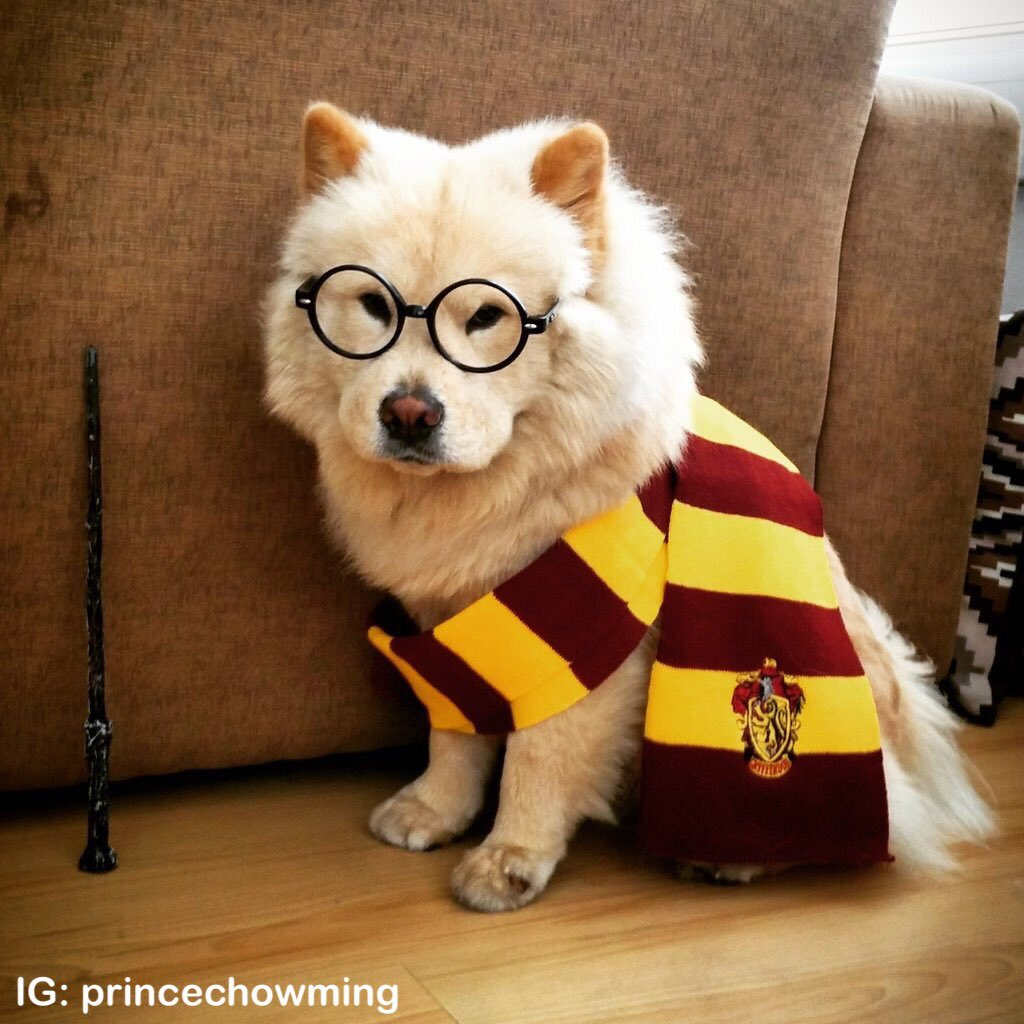

In [70]:
# Image of the winning dog at rating 1.5
jpg_url= t_archive_clean.loc[t_archive_clean['rating_ratio'] == 7.5, 'jpg_url'].iloc[0]
Image(jpg_url)

Text(0.5,1,'Dog Rating Distribution')

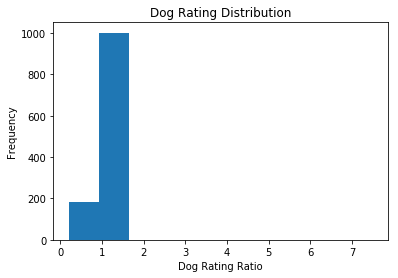

In [88]:
# Dog Rating Distribution

t_archive_clean['rating_ratio'].plot(kind='hist')
plt.xlabel('Dog Rating Ratio')
plt.title('Dog Rating Distribution')

Text(0.5,1,'Dog Rating Distribution')

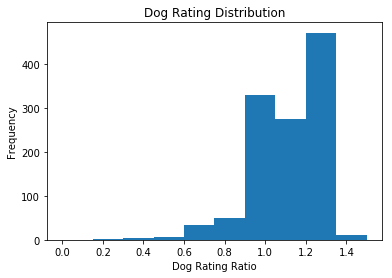

In [91]:
# Dog Rating Distribution with range 0.0 and 1.5

t_archive_clean['rating_ratio'].plot(kind='hist', range=[0.0, 1.5])
plt.xlabel('Dog Rating Ratio')
plt.title('Dog Rating Distribution')

##### Most of the dog ratings are at between 1.0 and 1.5 and we can notice that this is left-skewed distribution.

### 2. Dog Stage

In [72]:
dog_stage = t_archive_clean.dog_stage.value_counts()
dog_stage

pupper           94
doggo            33
puppo            15
floofer           5
doggo, pupper     3
Name: dog_stage, dtype: int64

Text(0.5,1,'Dog Stages Pie Chart')

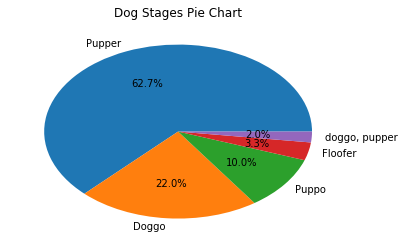

In [73]:
plt.pie(dog_stage, labels = ['Pupper', 'Doggo', 'Puppo', 'Floofer', 'doggo, pupper'],
       autopct = '%1.1f%%')
plt.title('Dog Stages Pie Chart')

##### Pupper has the highest percentage share and Floofer has the lowest.

### 3. Dog Breeds

In [74]:
dog_breed = t_archive_clean.dog_breed.value_counts()
dog_breed.head(10)

Golden Retriever      105
Labrador Retriever     72
Pembroke               70
Chihuahua              67
Pug                    45
Toy Poodle             39
Chow                   36
Pomeranian             28
French Bulldog         26
Samoyed                25
Name: dog_breed, dtype: int64

Text(0,0.5,'Breed')

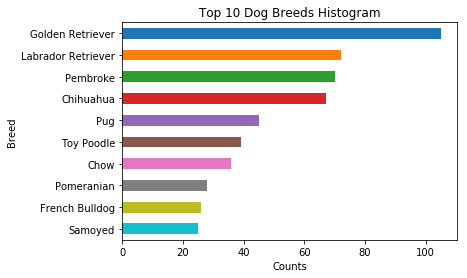

In [75]:
dog_breed.head(10).plot(kind='barh').invert_yaxis()
plt.title('Top 10 Dog Breeds Histogram')
plt.xlabel('Counts')
plt.ylabel('Breed')

##### The most popular dog breed is Golden Retriever followed by Labrador Retriever and Pembroke.

### 4. Retweet vs Favorite

Text(0,0.5,'Favorite Count')

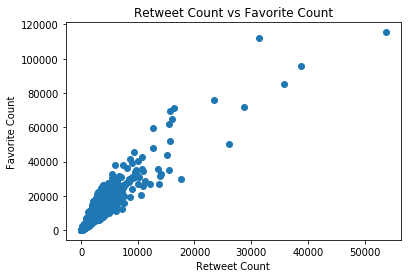

In [76]:
retweet = t_archive_clean.retweet_count
favorite = t_archive_clean.favorite_count
plt.scatter(retweet, favorite)
plt.title('Retweet Count vs Favorite Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

##### There is a linear relationship between Retweet count and Favorite count. As retweet count increases, favorite count tends to increase by a constant rate.

### 4. Correlations

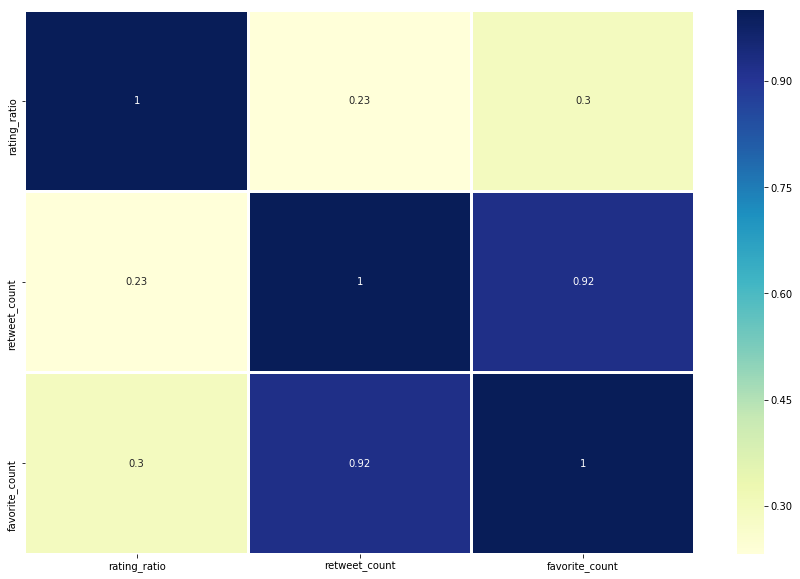

In [77]:
plt.figure(figsize=(15, 10))
sns.heatmap(t_archive_clean.corr(), linewidth=1.5,annot=True,cmap="YlGnBu");

##### It looks like there is high correlation (0.92) between Retweets and Favorites counts. 
##### There are low correlations between the Rating vs Favorite (0.30) and the Rating vs Retweet (0.23).

### 5. Rating Ratio Time Series

In [78]:
df_time = t_archive_clean.copy()

In [79]:
df_time.index = df_time.timestamp
df_time.sort_index(inplace = True)

In [80]:
df_time.head(1)

,tweet_id,name,timestamp,dog_stage,dog_breed,rating_ratio,retweet_count,favorite_count,text,jpg_url
timestamp,,,,,,,,,,
2015-11-17 00:53:15,666418789513326592,Walter,2015-11-17 00:53:15,NaN,Toy Terrier,1.0,39.0,109.0,This is Walter. He is an Alaskan Terrapin. Lov...,https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg


In [81]:
df_time.tail(1)

,tweet_id,name,timestamp,dog_stage,dog_breed,rating_ratio,retweet_count,favorite_count,text,jpg_url
timestamp,,,,,,,,,,
2017-08-01 00:17:27,892177421306343426,Tilly,2017-08-01 00:17:27,NaN,Chihuahua,1.3,5447.0,30144.0,This is Tilly. She's just checking pup on you....,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg


Text(0,0.5,'Rating Ratio')

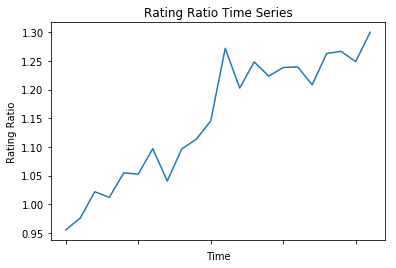

In [82]:
df_time.groupby([(df_time.index.year),(df_time.index.month)]).rating_ratio.mean().plot()
plt.title("Rating Ratio Time Series")
plt.xlabel("Time")
plt.ylabel("Rating Ratio")

##### The mean of the Rating Ratio tend to increase as time passes.